In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #не помню о чем договорились: можно или нельзя использовать эту библиотеку? 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os
from sklearn import metrics

In [2]:
iris_data = pd.read_csv("C:/Users/Anatoly/Desktop/Desktop_AI_education/algods/lesson8/Iris.csv", index_col='Id')

In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
## Произведем кодировку видов ирисов
iris_data.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

In [7]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


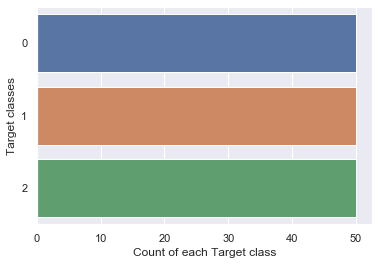

In [8]:
sns.countplot(y=iris_data.Species ,data=iris_data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

1. 150 строк
2. 4 независимые переменные - как признаки
3. Нет пропущенных данных
4. 3 вида : 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'
5. выборка сбалансированна (50 в каждом виде).

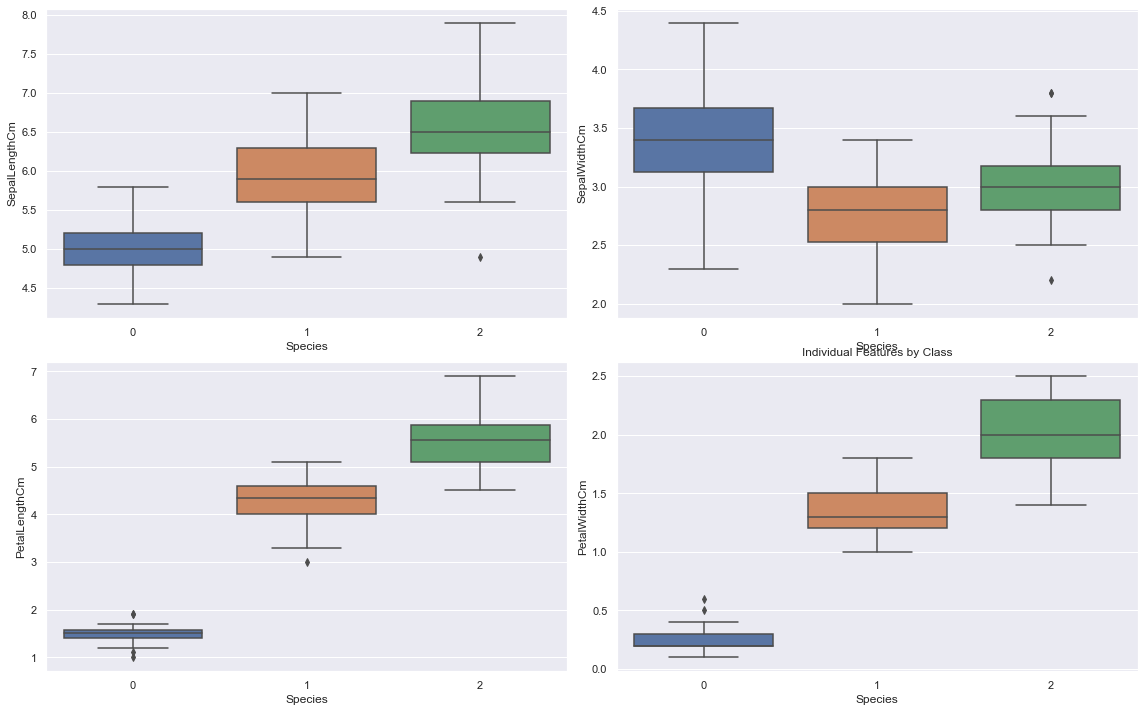

In [9]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(iris_data.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = iris_data['Species'], y = iris_data[iris_data.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

C:\Users\Anatoly\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Anatoly\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


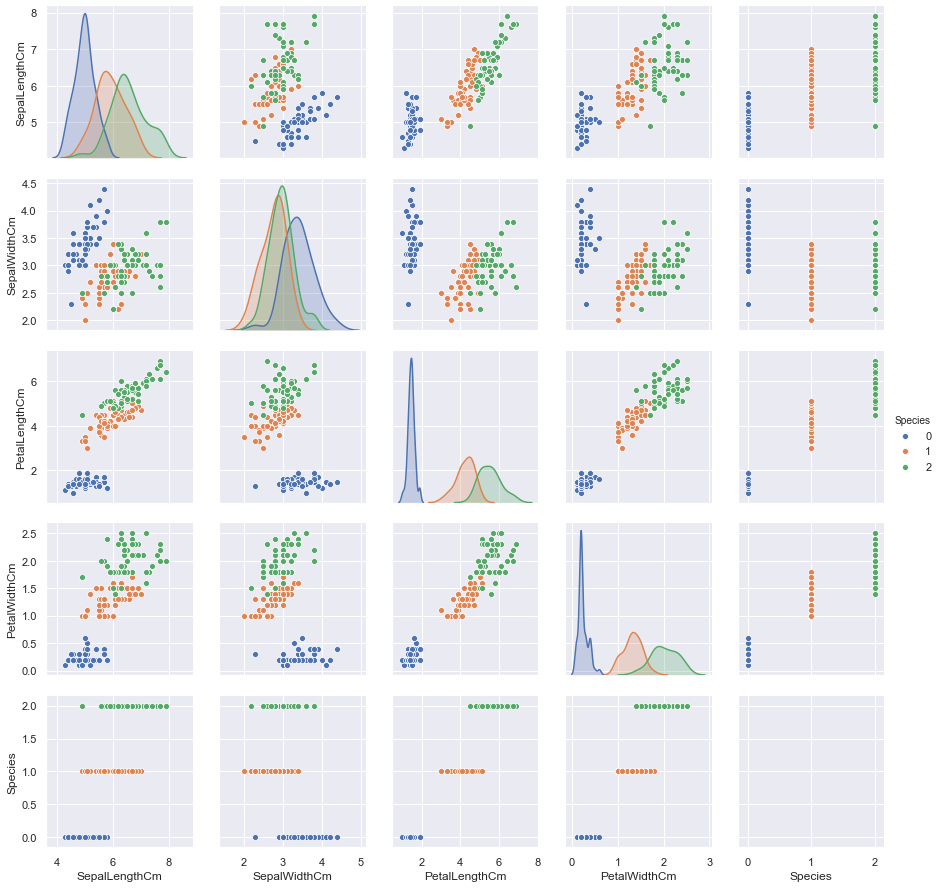

In [10]:
p=sns.pairplot(iris_data, hue = 'Species')

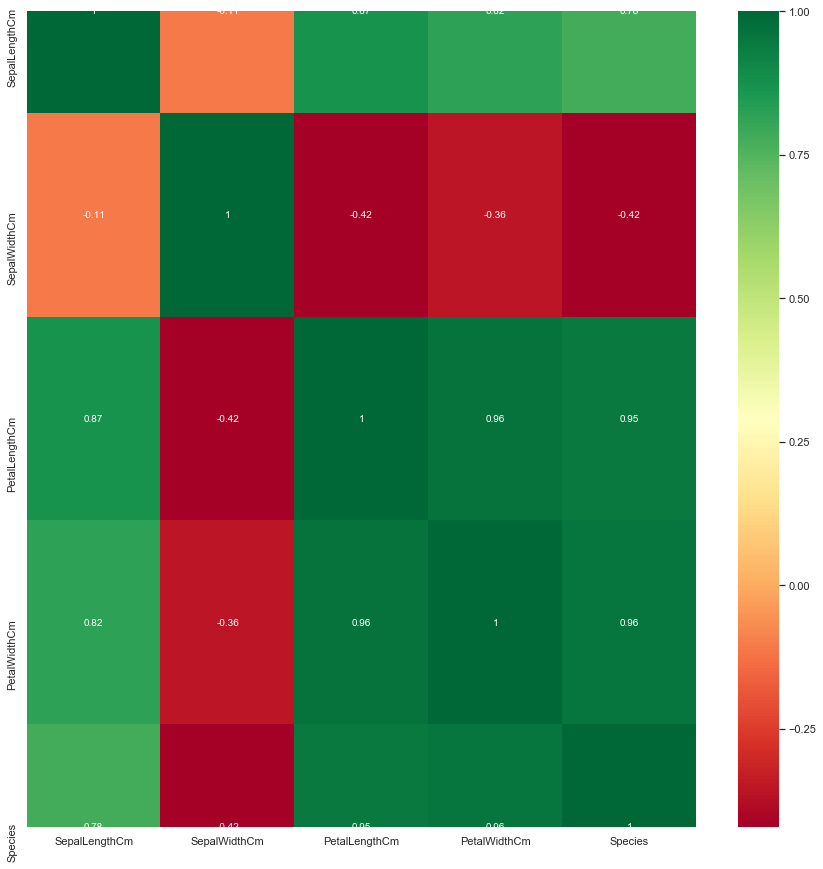

In [11]:
plt.figure(figsize=(15,15))
p=sns.heatmap(iris_data.corr(), annot=True,cmap='RdYlGn') 

# 1. Без PCA

In [12]:
X = iris_data.drop(['Species'],axis=1)
y = iris_data.Species

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=30, stratify=y)

In [14]:
#LOGREG

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(f'Точность на test выборке', metrics.accuracy_score(y_test, y_pred))

Точность на test выборке 0.9111111111111111


# 2. С PCA

In [16]:
X = iris_data

In [17]:
X.shape

(150, 5)

In [18]:
X = X.astype(float)

def standard_scale(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res

X = standard_scale(X)

In [19]:
X[:10]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,-0.897674,1.028611,-1.336794,-1.308593,-1.220656
2,-1.139200,-0.124540,-1.336794,-1.308593,-1.220656
3,-1.380727,0.336720,-1.393470,-1.308593,-1.220656
4,-1.501490,0.106090,-1.280118,-1.308593,-1.220656
5,-1.018437,1.259242,-1.336794,-1.308593,-1.220656
6,-0.535384,1.951133,-1.166767,-1.046525,-1.220656
7,-1.501490,0.797981,-1.336794,-1.177559,-1.220656
8,-1.018437,0.797981,-1.280118,-1.308593,-1.220656
9,-1.743017,-0.355171,-1.336794,-1.308593,-1.220656


In [20]:
# Найдем собственные векторы и собственные значения
 
covariance_matrix = X.T @ X

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения и собственные векторы в порядке убывания:')
for i in eig_pairs:
    print(i)

Собственные значения и собственные векторы в порядке убывания:
(570.6018547742898, array([-0.44562611,  0.22858246, -0.50657161, -0.49736266, -0.49515959]))
(137.28678913878176, array([ 0.37804172,  0.92268061,  0.02641607,  0.07007419, -0.01169435]))
(27.790691662985775, array([ 0.75213041, -0.28533914,  0.02912116, -0.38662225, -0.4500629 ]))
(6.274832851381008, array([ 0.14090563,  0.00500553, -0.24652289, -0.6096403 ,  0.74005791]))
(3.0458315725622245, array([ 0.27008753, -0.12233999, -0.82526712,  0.47600623,  0.06661758]))


In [21]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперь оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[76.59085298983751, 18.42775693138009, 3.7302941829511083, 0.84225944313839, 0.4088364526929158]
Кумулятивная доля дисперсии по компонентам 
[ 76.59085299  95.01860992  98.7489041   99.59116355 100.        ]


In [22]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack([eig_pairs[i][1].reshape(5,1) for i in range(2)])

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[-0.44562611  0.37804172]
 [ 0.22858246  0.92268061]
 [-0.50657161  0.02641607]
 [-0.49736266  0.07007419]
 [-0.49515959 -0.01169435]]


In [23]:
# Сформируем новую матрицу "объекты-признаки"
Z = X.dot(W)

In [24]:
Z[:10]

,0,1
Id,,
1,2.567596,0.496985
2,2.411636,-0.658313
3,2.653413,-0.325521
4,2.597090,-0.580978
5,2.674129,0.664129
6,2.400548,1.507994
7,2.718783,0.065101
8,2.539983,0.240030
9,2.627994,-1.099379


In [25]:
Z_train, Z_test, y_train, y_test = train_test_split(Z, y,
                                                    test_size=0.3,
                                                    random_state=30,
                                                    stratify=y)

In [26]:
logreg = LogisticRegression()
logreg.fit(Z_train, y_train)
y_pred = logreg.predict(Z_test)
print(f'Точность на test выборке', metrics.accuracy_score(y_test, y_pred))

Точность на test выборке 0.9777777777777777


In [27]:
# Вывод: при релевантном разбиении датасета логистическая регрессия дает более точные предсказания с применением PCA